<a href="https://colab.research.google.com/github/wolego2uni/ibm_demo/blob/main/Playing__with_dates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
#import libraries 

import numpy as np
import pandas as pd
from datetime import datetime
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot


In [25]:
# Lets create a pandas dataframe for the year 2021
#method 1
df = pd.date_range(start='2021-01-01', end='2021-12-31', freq='D')
#check the image below for other freq options 
#method 2
# df = pd.date_range(start='2021-01-01', periods=365)
df

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25',
               '2021-12-26', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

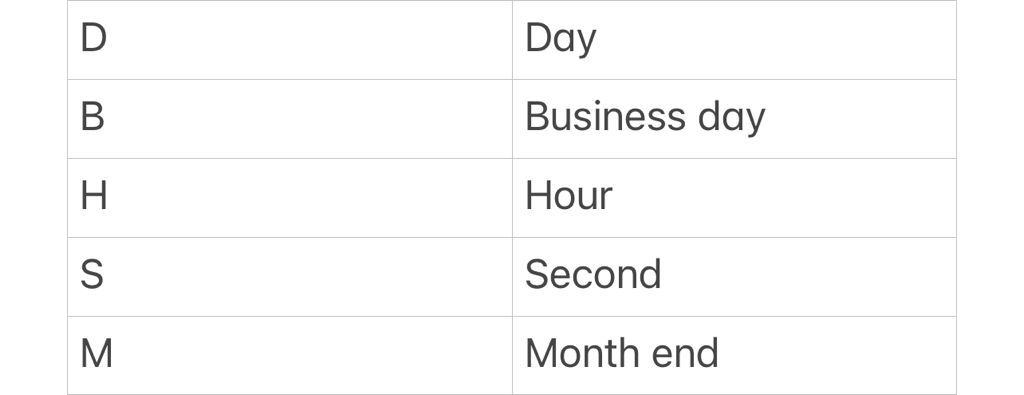

In [26]:
#Make a dataframe with column= date
df = pd.DataFrame(df, columns=['date'])

In [27]:
len(df)

365

In [28]:
# And add a 'made up' column for temp
df['temp'] = np.random.randint(0,60,size=(len(df)))
df.head()

,date,temp
0,2021-01-01,14
1,2021-01-02,49
2,2021-01-03,19
3,2021-01-04,39
4,2021-01-05,38


In [29]:
# Set your date as the index 
df = df.set_index('date')
df.head()

,temp
date,
2021-01-01,14
2021-01-02,49
2021-01-03,19
2021-01-04,39
2021-01-05,38


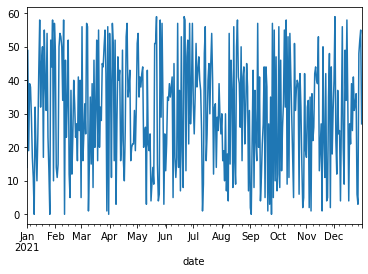

In [47]:
df['temp'].plot()

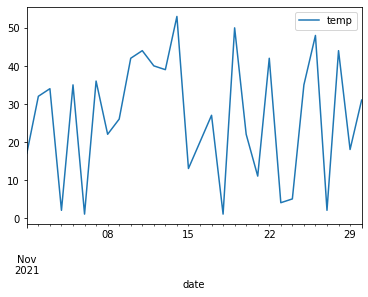

In [50]:
df.loc['2021-11-01':'2021-11-30'].plot()

In [30]:
#extract information about a certain day's temp 
df.loc['2021-11-01', 'temp']

17

In [52]:
#extracting information for a range of dates 
df.loc['2021-11-01':'2021-11-10']

,temp,classes
date,,
2021-11-01,17,Medium
2021-11-02,32,High
2021-11-03,34,High
2021-11-04,2,Low
2021-11-05,35,High
2021-11-06,1,Low
2021-11-07,36,High
2021-11-08,22,Medium
2021-11-09,26,Medium


Lets say we want to convert the daily tempature into categorical variables, say we want to classify the temps into low,medium, high and very high temperatures. We use binning. 

In [32]:
bins = np.linspace(min(df["temp"]), max(df["temp"]), 5)
bins

array([ 0.  , 14.75, 29.5 , 44.25, 59.  ])

In [33]:
classes = ['Low', 'Medium', 'High', 'VeryHigh']

In [34]:
df['classes'] =pd.cut(df['temp'], bins, labels=classes, include_lowest=True)
df[['temp','classes']].head(20)

,temp,classes
date,,
2021-01-01,14,Low
2021-01-02,49,VeryHigh
2021-01-03,19,Medium
2021-01-04,39,High
2021-01-05,38,High
2021-01-06,29,Medium
2021-01-07,17,Medium
2021-01-08,11,Low
2021-01-09,0,Low


In [40]:
#Lets view the mean temp for each class
df.pivot_table(values='temp', index='classes', aggfunc=np.mean, margins=True)
#set margins to false to remove the totals

#Method 2
#df.groupby('classes')['temp'].mean() 

,temp
classes,
Low,6.901235
Medium,21.413043
High,37.273585
VeryHigh,52.627907


Text(0.5, 1.0, 'Temperature types')

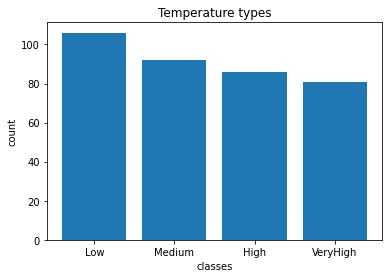

In [46]:
#plotting the classes
pyplot.bar(classes, df["classes"].value_counts())
plt.pyplot.xlabel("classes")
plt.pyplot.ylabel("count")
plt.pyplot.title("Temperature types")
